In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [4]:
def f2(n1, n2, d, rnd, eta, iteration=1000):
    """
    生成n1个点用于训练，生成n2个点用于测试,eta为步长
    """
    X_train, y_train = hlp.data(n1, d, rnd)
    X_test, y_test = hlp.data(n2, d, rnd)

    #记录次数
    T = 0
    w = np.zeros(d + 1)
    while hlp.Judge(X_train,y_train,w) == False and T<iteration:
        i = np.random.randint(0,n1)
        s = X_train[i,:].dot(w)
        ys = s * y_train[i]
        if ys <= 1:   #把点和分类超平面的closeness纳入考虑
            w += eta * (y_train[i] - s) * X_train[i,:]
            T += 1
    
    print('目标w为：',w)
    #计算错误率
    y_predict = X_test.dot(w)
    error_rate = np.sum(y_predict * y_test <= 0) / n2
    print('eta为{}时，最终错误率为：{}'.format(eta,error_rate))
    
    #算法得到的拟合直线
    X3 = np.arange(-1, 1, 0.1)
    Y3 = (X3*w[1] + w[0]) / -w[2]
    
    #目标直线
    X4 = np.arange(-1, 1, 0.1)
    Y4 = -X4
    
    plt.scatter(X_train[y_train==1][:,1],X_train[y_train==1][:,2],c='r')
    plt.scatter(X_train[y_train==-1][:,1],X_train[y_train==-1][:,2],c='b')
    plt.plot(X3,Y3,label='{:.2f}x1+{:.2f}x2=0'.format(w[1],w[2],w[0]))
    plt.plot(X4,Y4,label='x1+x2=0')
    plt.title('经过{}次迭代收敛'.format(T))
    plt.legend()
    plt.show()

目标w为： [-0.06544651  7.90092938  7.90946219]
eta为1时，最终错误率为：0.002


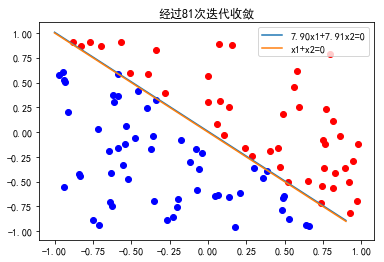

目标w为： [-0.00918894  0.59124862  0.59443821]
eta为0.1时，最终错误率为：0.008


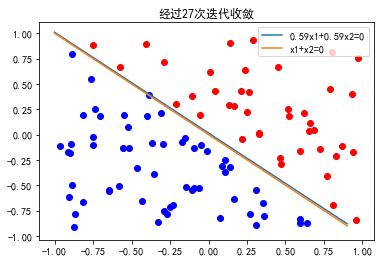

目标w为： [0.03397264 1.08781702 1.33712606]
eta为0.01时，最终错误率为：0.044


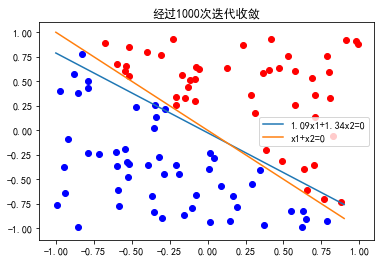

目标w为： [0.08635335 0.29279217 0.28973187]
eta为0.001时，最终错误率为：0.153


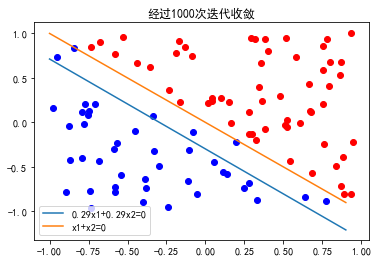

In [5]:
seed = 1126
rnd = np.random.RandomState(seed)
Eta = [1, 0.1, 0.01, 0.001]
for eta in Eta:
    f2(100,1000,2,rnd,eta)